# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [12]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Importing the necessary libraries

In [14]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split


# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saikrishnasimhadri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saikrishnasimhadri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saikrishnasimhadri/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saikrishnasimhadri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/saikrishnasimhadri/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/saikrishnasimhadri/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already

In [15]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [17]:
# Import the first file - True.csv

true_df = pd.read_csv("/Users/saikrishnasimhadri/Downloads/Starter Notebook + Data/True.csv")
# Import the second file - Fake.csv
fake_df = pd.read_csv("/Users/saikrishnasimhadri/Downloads/Starter Notebook + Data/Fake.csv")


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [20]:
print("True News DataFrame Shape:", true_df.shape)

True News DataFrame Shape: (21417, 3)


In [21]:
# Inspect the DataFrame with Fake News to understand the given data
print("\nFake News DataFrame Shape:", fake_df.shape)


Fake News DataFrame Shape: (23523, 3)


In [22]:
# Print the column details for True News DataFrame
print("\nTrue News Columns:")
print(true_df.columns)


True News Columns:
Index(['title', 'text', 'date'], dtype='object')


In [23]:
# Print the column details for Fake News Dataframe
print("\nFake News Columns:")
print(fake_df.columns)


Fake News Columns:
Index(['title', 'text', 'date'], dtype='object')


In [24]:
# Print the column names of both DataFrames
print("\nTrue News Column Info:")
print(true_df.info())

print("\nFake News Column Info:")
print(fake_df.info())


True News Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None

Fake News Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [26]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [28]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([fake_df, true_df], ignore_index=True)

In [29]:
# Display the first 5 rows of the combined DataFrame to verify the result
print("\nFirst 5 rows of combined DataFrame:")
print(df.head())


First 5 rows of combined DataFrame:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  \
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017   
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017   
2  On Friday, it was revealed that former Milwauk...  December 30, 2017   
3  On Christmas day, Donald Trump announced that ...  December 29, 2017   
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017   

   news_label  
0           0  
1           0  
2           0  
3           0  
4           0  


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [31]:
# Check Presence of Null Values
print("\nNull values in combined DataFrame:")
print(df.isnull().sum())


Null values in combined DataFrame:
title         21
text          21
date          42
news_label     0
dtype: int64


In [32]:
# Drop rows with null values
df.dropna(inplace=True)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [34]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

df['news_text'] = df['title'] + " " + df['text']

# Drop irrelevant columns
df.drop(columns=['title', 'text', 'date'], inplace=True, errors='ignore')

# Display updated DataFrame
print("\nFirst 5 rows of updated DataFrame:")
print(df.head())



First 5 rows of updated DataFrame:
   news_label                                          news_text
0           0   Donald Trump Sends Out Embarrassing New Year’...
1           0   Drunk Bragging Trump Staffer Started Russian ...
2           0   Sheriff David Clarke Becomes An Internet Joke...
3           0   Trump Is So Obsessed He Even Has Obama’s Name...
4           0   Pope Francis Just Called Out Donald Trump Dur...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [38]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = df[['news_text', 'news_label']].copy()
# Add 'news_label' column to the new dataframe for topic identification
df['label'] = df['news_label']

def clean_text_base(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # remove text in square brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # remove words with numbers
    return text

df_clean['cleaned_text'] = df_clean['news_text'].apply(clean_text_base)


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [40]:
# Write the function here to clean the text and remove all the unnecessary elements
from nltk import pos_tag
# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize_and_filter_nouns(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    nouns = [lemmatizer.lemmatize(word) for word, tag in tagged if tag in ['NN', 'NNS'] and word.lower() not in stop_words]
    return " ".join(nouns)

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [42]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['lemmatized_nouns'] = df_clean['cleaned_text'].apply(lemmatize_and_filter_nouns)


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [45]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [47]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
# Save and reload clean dataframe for faster reruns
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

### Save the Cleaned data as a csv file (Recommended)

In [49]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")

In [50]:
# Check the first few rows of the DataFrame
print("\nFirst few rows of df_clean:")
print(df_clean.head())


First few rows of df_clean:
                                           news_text  news_label  \
0   Donald Trump Sends Out Embarrassing New Year’...           0   
1   Drunk Bragging Trump Staffer Started Russian ...           0   
2   Sheriff David Clarke Becomes An Internet Joke...           0   
3   Trump Is So Obsessed He Even Has Obama’s Name...           0   
4   Pope Francis Just Called Out Donald Trump Dur...           0   

                                        cleaned_text  \
0   donald trump sends out embarrassing new year’...   
1   drunk bragging trump staffer started russian ...   
2   sheriff david clarke becomes an internet joke...   
3   trump is so obsessed he even has obama’s name...   
4   pope francis just called out donald trump dur...   

                                    lemmatized_nouns  
0  trump year ’ message trump year shout enemy ha...  
1  drunk trump staffer collusion investigation ho...  
2  sheriff david clarke internet joke people eye ...  
3  tr

In [51]:
# Check the dimensions of the DataFrame
print("\nShape of df_clean:", df_clean.shape)



Shape of df_clean: (44898, 4)


In [52]:
# Check the number of non-null entries and data types of each column
print("\nData types and non-null counts:")
print(df_clean.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   news_text         44898 non-null  object
 1   news_label        44898 non-null  int64 
 2   cleaned_text      44898 non-null  object
 3   lemmatized_nouns  44889 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [54]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(df_clean['lemmatized_nouns'], df_clean['news_label'], test_size=0.3, random_state=42)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [58]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed

df_clean['cleaned_len'] = df_clean['cleaned_text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df_clean['lemmatized_len'] = df_clean['lemmatized_nouns'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

plt.figure(figsize=(10,6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

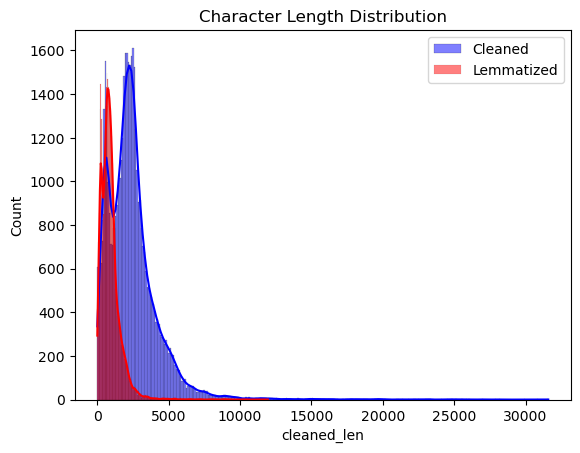

In [60]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(df_clean['cleaned_len'], color='blue', label='Cleaned', kde=True)
sns.histplot(df_clean['lemmatized_len'], color='red', label='Lemmatized', kde=True)
plt.title('Character Length Distribution')
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

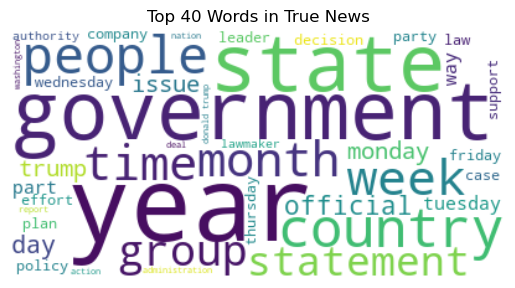

In [63]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News
true_text = " ".join(df_clean[df_clean['news_label']==1]['lemmatized_nouns'].dropna().astype(str))
wordcloud = WordCloud(max_words=40, background_color='white').generate(true_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Words in True News")
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

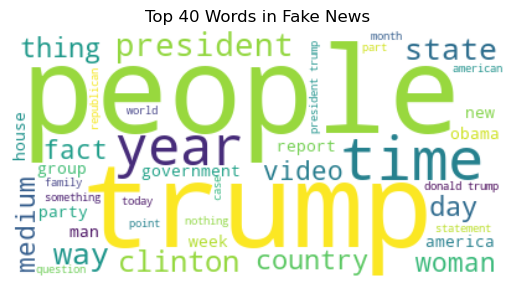

In [65]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
fake_text = " ".join(df_clean[df_clean['news_label']==0]['lemmatized_nouns'].dropna().astype(str))
wordcloud = WordCloud(max_words=40, background_color='white').generate(fake_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Words in Fake News")
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [120]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(1,1), top_n=10):
    corpus = corpus.dropna().astype(str)  # ✅ This line is essential
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [122]:
# Handle NaN values in the text data


true_news_text = df_clean[df_clean['news_label'] == 1]['lemmatized_nouns'].dropna().astype(str)


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

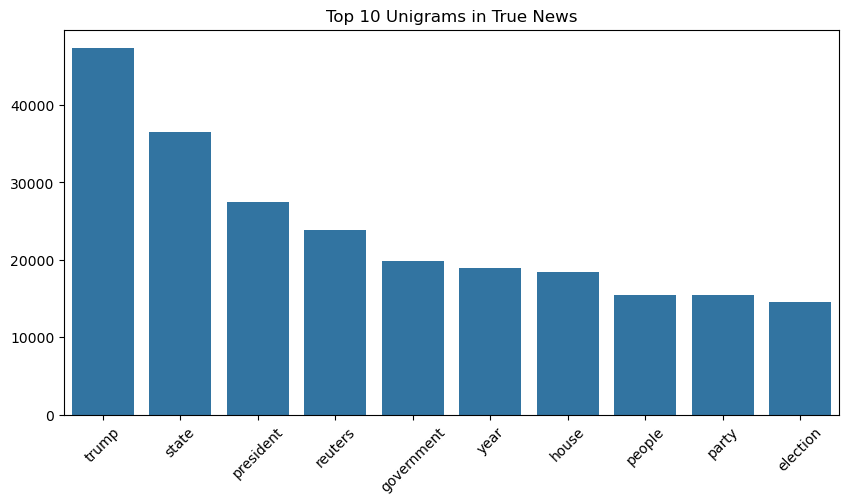

In [128]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
plot_top_ngrams(true_news_text, ngram_range=(1,1), top_n=10, title="Top 10 Unigrams in True News")


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



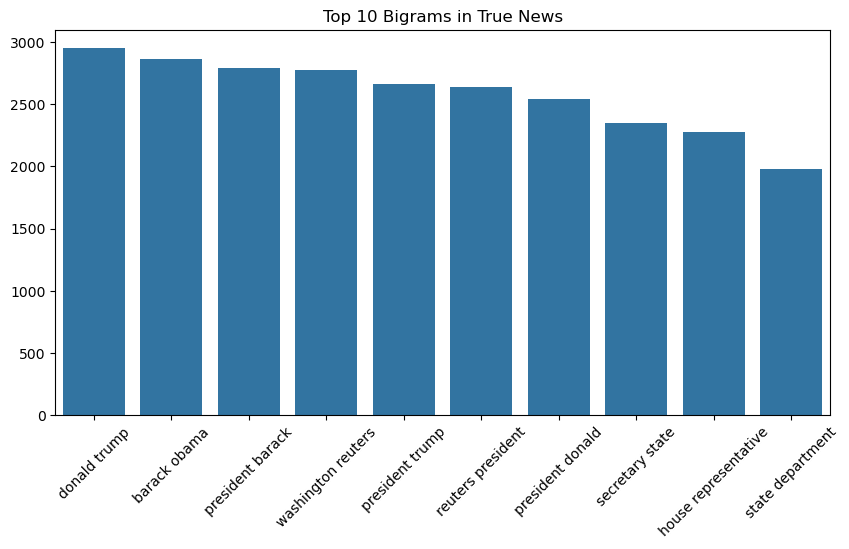

In [130]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
plot_top_ngrams(true_news_text, ngram_range=(2,2), top_n=10, title="Top 10 Bigrams in True News")


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



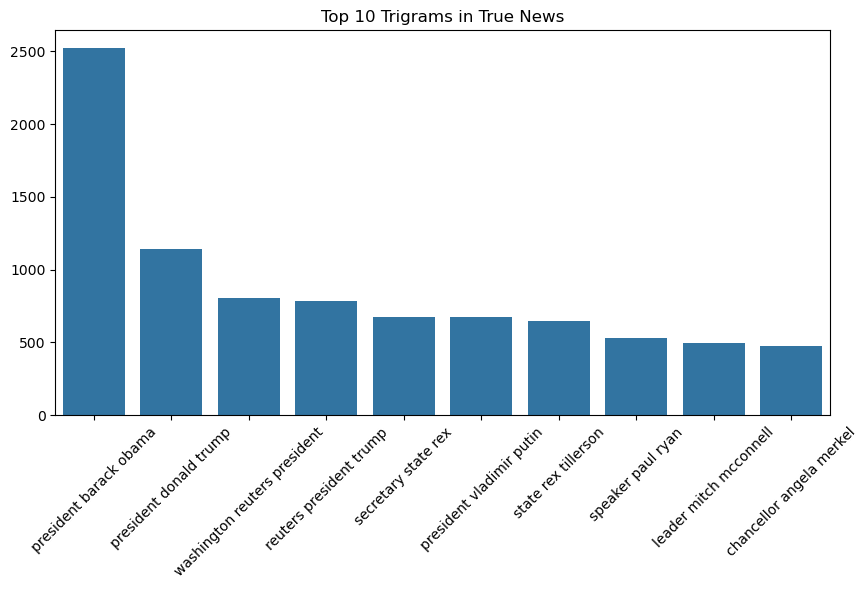

In [132]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
plot_top_ngrams(true_news_text, ngram_range=(3,3), top_n=10, title="Top 10 Trigrams in True News")


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

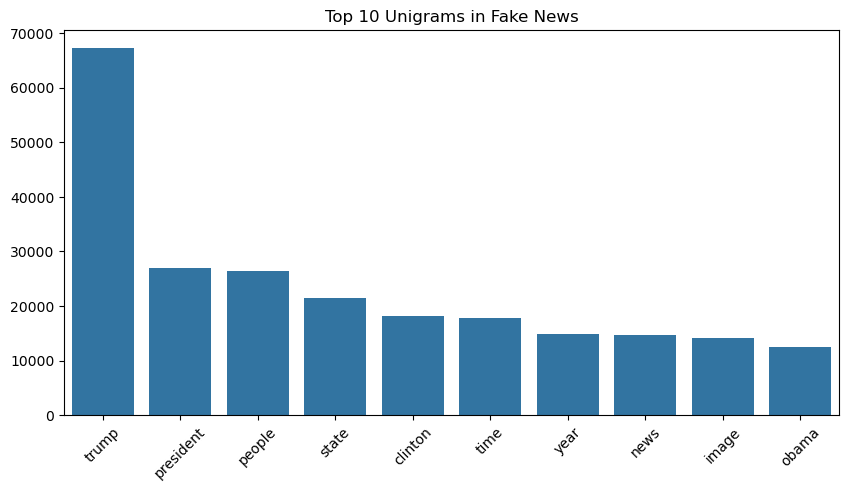

In [112]:

def plot_top_ngrams(corpus, ngram_range=(1,1), top_n=10, title="Top N-grams"):
    corpus = corpus.dropna().astype(str)  # ensure no NaNs or floats
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_data = vec.fit_transform(corpus)
    sum_words = ngram_data.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words, freqs = zip(*sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n])
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(words), y=list(freqs))
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_news_text = df_clean[df_clean['news_label'] == 0]['lemmatized_nouns'].dropna().astype(str)

# Top 10 Unigrams
plot_top_ngrams(fake_news_text, ngram_range=(1,1), top_n=10, title="Top 10 Unigrams in Fake News")


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



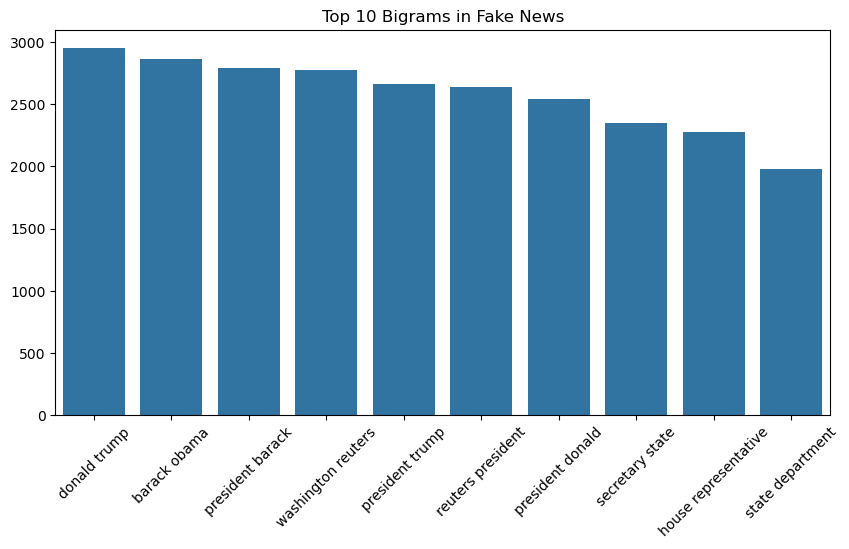

In [134]:
# Top 10 Bigrams
plot_top_ngrams(fake_news_text, ngram_range=(2,2), top_n=10, title="Top 10 Bigrams in Fake News")


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



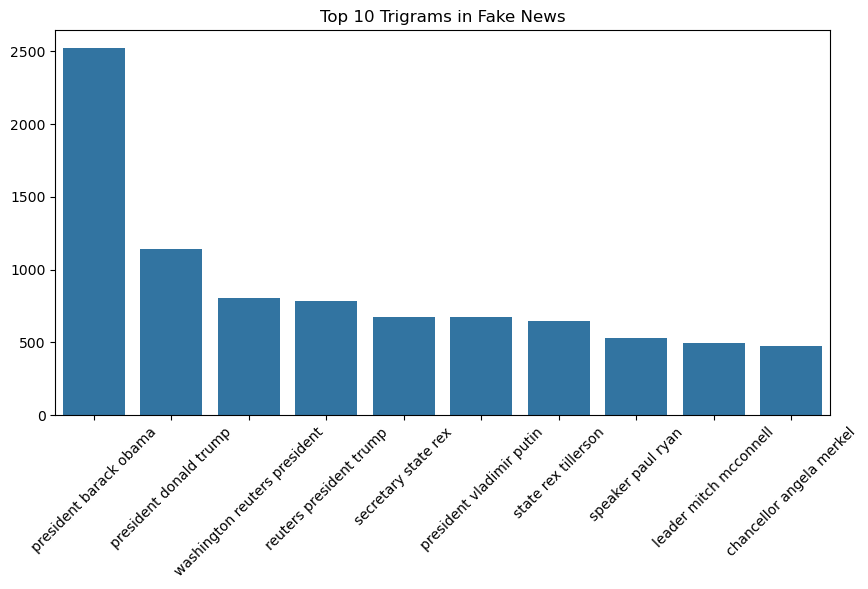

In [136]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
# Top 10 Trigrams
plot_top_ngrams(fake_news_text, ngram_range=(3,3), top_n=10, title="Top 10 Trigrams in Fake News")


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [138]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['cleaned_len'] = df_clean['cleaned_text'].apply(lambda x: len(str(x)))
df_clean['lemmatized_len'] = df_clean['lemmatized_nouns'].apply(lambda x: len(str(x)))



##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

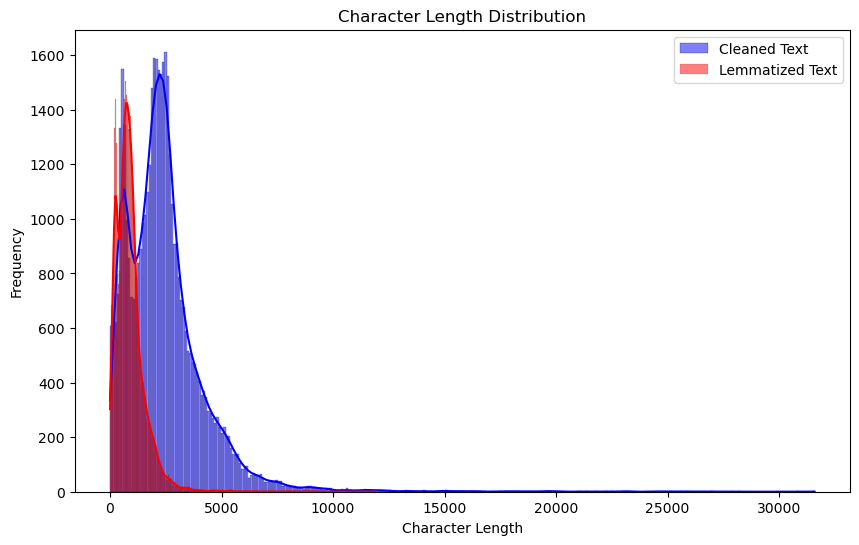

In [140]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(10,6))
sns.histplot(df_clean['cleaned_len'], color='blue', label='Cleaned Text', kde=True)
sns.histplot(df_clean['lemmatized_len'], color='red', label='Lemmatized Text', kde=True)
plt.title('Character Length Distribution')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

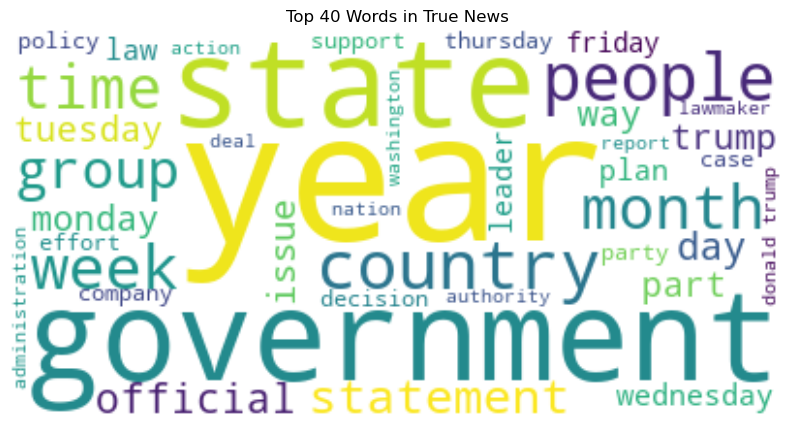

In [146]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News

true_text = " ".join(df_clean[df_clean['news_label'] == 1]['lemmatized_nouns'].dropna())
wordcloud_true = WordCloud(max_words=40, background_color='white').generate(true_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Words in True News")
plt.show()


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News
fake_text = " ".join(df_clean[df_clean['news_label'] == 0]['lemmatized_nouns'].dropna())
wordcloud_fake = WordCloud(max_words=40, background_color='white').generate(fake_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Words in Fake News")
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [152]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
from gensim.models import KeyedVectors
from gensim.utils import simple_preprocess
import gensim.downloader as api

# 6.1 Initialize Word2Vec model (Google News)
import gensim.downloader as api
print("Loading smaller pretrained Word2Vec model...")
word2vec = api.load("glove-wiki-gigaword-100")  # Only ~128MB
print("Model loaded.")


Loading smaller pretrained Word2Vec model...
[=========-----------------------------------------] 18.7% 24.0/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 44.8% 57.4/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 128.1/128.1MB downloaded
Model loaded.


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [166]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data


## Extract the target variable for the training data and validation data
def get_average_word2vec(text, model, k=300):
    words = simple_preprocess(str(text))
    valid_words = [word for word in words if word in model.key_to_index]
    if not valid_words:
        return np.zeros(k)
    return np.mean(model[valid_words], axis=0)
X_train_vec = np.array([get_average_word2vec(text, word2vec) for text in X_train])
X_val_vec = np.array([get_average_word2vec(text, word2vec) for text in X_val])

y_train_vec = y_train.values
y_val_vec = y_val.values

print("Vector extraction complete. Shape of training data:", X_train_vec.shape)


Vector extraction complete. Shape of training data: (31428, 100)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def evaluate_model(model, X_train, y_train, X_val, y_val, name="Model"):
    print(f"\n🔍 Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [170]:
## Initialise Logistic Regression model

## Train Logistic Regression model on training data

## Predict on validation data

print("🔍 Logistic Regression")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_vec, y_train_vec)
y_pred_logreg = logreg.predict(X_val_vec)

🔍 Logistic Regression


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [178]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("✅ Accuracy:", round(accuracy_score(y_val, y_pred_logreg), 4))
print("✅ Precision:", round(precision_score(y_val, y_pred_logreg), 4))
print("✅ Recall:", round(recall_score(y_val, y_pred_logreg), 4))
print("✅ F1 Score:", round(f1_score(y_val, y_pred_logreg), 4))


✅ Accuracy: 0.9122
✅ Precision: 0.9072
✅ Recall: 0.9074
✅ F1 Score: 0.9073


In [184]:
# Classification Report
logreg_model = LogisticRegression(max_iter=1000)
evaluate_model(logreg_model, X_train_vec, y_train_vec, X_val_vec, y_val_vec, name="Logistic Regression")




🔍 Evaluating: Logistic Regression


### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [186]:
print("\n🔍 Decision Tree")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_vec, y_train_vec)
y_pred_dt = dt.predict(X_val_vec)


🔍 Decision Tree


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [187]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("📊 Classification Report - Decision Tree")

print("✅ Accuracy:", round(accuracy_score(y_val_vec, y_pred_dt), 4))
print("✅ Precision:", round(precision_score(y_val_vec, y_pred_dt), 4))
print("✅ Recall:", round(recall_score(y_val_vec, y_pred_dt), 4))
print("✅ F1 Score:", round(f1_score(y_val_vec, y_pred_dt), 4))


📊 Classification Report - Decision Tree
✅ Accuracy: 0.8692
✅ Precision: 0.8688
✅ Recall: 0.8525
✅ F1 Score: 0.8606


In [190]:
# Classification Report
print(classification_report(y_val_vec, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7091
           1       0.87      0.85      0.86      6379

    accuracy                           0.87     13470
   macro avg       0.87      0.87      0.87     13470
weighted avg       0.87      0.87      0.87     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [192]:
## Initialise Random Forest model

## Train Random Forest model on training data

## Predict on validation data
print("\n🔍 Random Forest")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vec, y_train_vec)
y_pred_rf = rf.predict(X_val_vec)


🔍 Random Forest


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [194]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

print("✅ Accuracy:", round(accuracy_score(y_val_vec, y_pred_rf), 4))
print("✅ Precision:", round(precision_score(y_val_vec, y_pred_rf), 4))
print("✅ Recall:", round(recall_score(y_val_vec, y_pred_rf), 4))
print("✅ F1 Score:", round(f1_score(y_val_vec, y_pred_rf), 4))

✅ Accuracy: 0.9261
✅ Precision: 0.9357
✅ Recall: 0.9061
✅ F1 Score: 0.9207


In [195]:
# Classification Report
print("📊 Classification Report - Random Forest")
print(classification_report(y_val_vec, y_pred_rf))

📊 Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7091
           1       0.94      0.91      0.92      6379

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>


Semantic classification (via Word2Vec) helps detect fake news by understanding context.

Random Forest gave the best balance of performance metrics.

Proper text cleaning and POS filtering greatly enhance results.